In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [32]:
#########################
# Data: Tweets / Weibos #
#########################

# ENGLISH
# https://www.kaggle.com/datasets/tariqsays/sentiment-dataset-with-1-million-tweets // 09/22/2020 - 10/10/2022 // 937854 tweets
tweets_kaggle = pd.read_csv("data/kaggle-20-22.csv")
tweets_kaggle.drop(columns=["Language", "Label"], inplace=True)
tweets_kaggle = tweets_kaggle.rename(columns={"Text": "tweet"})


# https://archive.ics.uci.edu/ml/datasets/Health+News+in+Twitterw // 2011-06-13 - 2015-04-09 // 62316 tweets
tweets_uci = pd.DataFrame()
directory = "data/uci-2015/"
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        try:
            df = pd.read_csv(
                directory + filename,
                sep="|",
                header=None,
                on_bad_lines="skip",
                engine="python",
            )
        except:
            print("Error reading file: " + filename)
            assert False
        df.columns = ["tweet_id", "date", "tweet"]
        df["date"] = pd.to_datetime(df["date"], format="%a %b %d %H:%M:%S %z %Y")
        df.drop(columns=["tweet_id"], inplace=True)
        tweets_uci = pd.concat([tweets_uci, df])

# 1,000,170 tweets in total
tweets = pd.concat([tweets_kaggle, tweets_uci])

# CHINESE
# https://github.com/brightmart/nlp_chinese_corpus, webtext2019zh dataset // 2015 - 2016 // 41,000,000 posts
weibo = pd.read_json("data/webtext15-16.json", lines=True)
weibo.drop_duplicates(subset=["qid"], inplace=True)

In [33]:
#######################
# Data: News Articles #
#######################

# ENGLISH
# https://components.one/datasets/all-the-news-2-news-articles-dataset/ // 2017-08-01 - 2018-02-01 // 2688878 articles
en_news = pd.read_csv("data/all-the-news.csv", parse_dates=["date"])
en_news.drop(columns=["url"], inplace=True)

# CHINESE
# https://www.kaggle.com/datasets/ceshine/yet-another-chinese-news-dataset
ch_news = pd.read_csv("data/ch-news.csv", parse_dates=["date"])
ch_news.drop(columns=["url", "image"], inplace=True)

In [41]:
#####################
# Data: Pre-process #
#####################

en_keywords = [
    "Alzheimer",
    "Dementia",
    "Ageing",
    "Memory loss",
    "Cognitive impairment",
    "Neurodegenerative disease",
    "Brain health",
    "Aging population",
    "Mild cognitive impairment",
    "Tau protein",
    "Beta-amyloid protein",
    "Brain imaging",
    "Neuropsychological testing",
    "Caregiving",
    "Risk factors",
    "Genetics",
    "Lifestyle interventions",
    "Pharmacotherapy",
    "Rehabilitation",
    "Social support",
    "Quality of life",
    "Long-term care",
    "Epidemiology",
]

if not os.path.exists("out"):
    os.makedirs("out")
    
print("Loading English data...")

# Cache filtered tweets
if os.path.exists("out/relevant_tweets.csv"):
    print("Loading cached tweets...")
    relevant_tweets = pd.read_csv("out/relevant_tweets.csv")
else:
    # 1987 relevant tweets
    print("Filtering tweets...")
    relevant_tweets = tweets[
        tweets.tweet.str.contains("|".join(en_keywords), case=False, na=False)
    ]
    relevant_tweets.to_csv("out/relevant_tweets.csv", header=True, index=False)


# Cache filtered news articles
if os.path.exists("out/relevant_en_news.csv"):
    print("Loading cached news articles...")
    relevant_en_news = pd.read_csv("out/relevant_en_news.csv")
else:
    # 1533 relevant news articles
    print("Filtering news articles...")
    relevant_en_news = en_news[
        en_news.title.str.contains("|".join(en_keywords), case=False, na=False)
    ]
    relevant_en_news.to_csv("out/relevant_en_news.csv", header=True, index=False)

Loading English data...
Loading cached tweets...
Loading cached news articles...


In [34]:
ch_keywords = [
    "阿尔茨海默",  # "Alzheimer"
    "失智",  # "Dementia"
    "老化",  # "Ageing"
    "减退",  # "Memory loss"
    "认知障碍",  # "Cognitive impairment"
    "神经退化",  # "Neurodegenerative disease"
    "大脑健康",  # "Brain health"
    "人口老龄化",  # "Aging population"
    "轻度认知障碍",  # "Mild cognitive impairment"
    "Tau蛋白",  # "Tau protein"
    "β-淀粉样蛋," "大脑成像",  # "Beta-amyloid protein"  # "Brain imaging"
    "神经心理学测试",  # "Neuropsychological testing"
    "照顾",  # "Caregiving"
    "风险因素",  # "Risk factors"
    "遗传",  # "Genetics"
    "药物",  # "Pharmacotherapy"
    "康复",  # "Rehabilitation"
    "社会支持",  # "Social support"
    "生活质量",  # "Quality of life"
    "长期护理",  # "Long-term care"
]

if not os.path.exists("out"):
    os.makedirs("out")

print("Loading Chinese data...")

# Cache filtered tweets
if os.path.exists("out/relevant_weibo.csv"):
    print("Loading cached weibos...")
    relevant_weibo = pd.read_csv("out/relevant_weibo.csv")
else:
    # 72776 relevant tweets
    print("Filtering weibos...")
    relevant_weibo = weibo[
        weibo.title.str.contains("|".join(ch_keywords), case=False, na=False)
        | weibo.desc.str.contains("|".join(ch_keywords), case=False, na=False)
    ]
    relevant_weibo.to_csv("out/relevant_weibo.csv", header=True, index=False)


# Cache filtered news articles
if os.path.exists("out/relevant_ch_news.csv"):
    print("Loading cached news articles...")
    relevant_ch_news = pd.read_csv("out/relevant_ch_news.csv")
else:
    # 467 relevant news articles
    print("Filtering news articles...")
    relevant_ch_news = ch_news[
        ch_news.title.str.contains("|".join(ch_keywords), case=False, na=False)
        | ch_news.desc.str.contains("|".join(ch_keywords), case=False, na=False)
    ]
    relevant_ch_news.to_csv("out/relevant_ch_news.csv", header=True, index=False)

Loading Chinese data...
Filtering weibos...
Loading cached news articles...


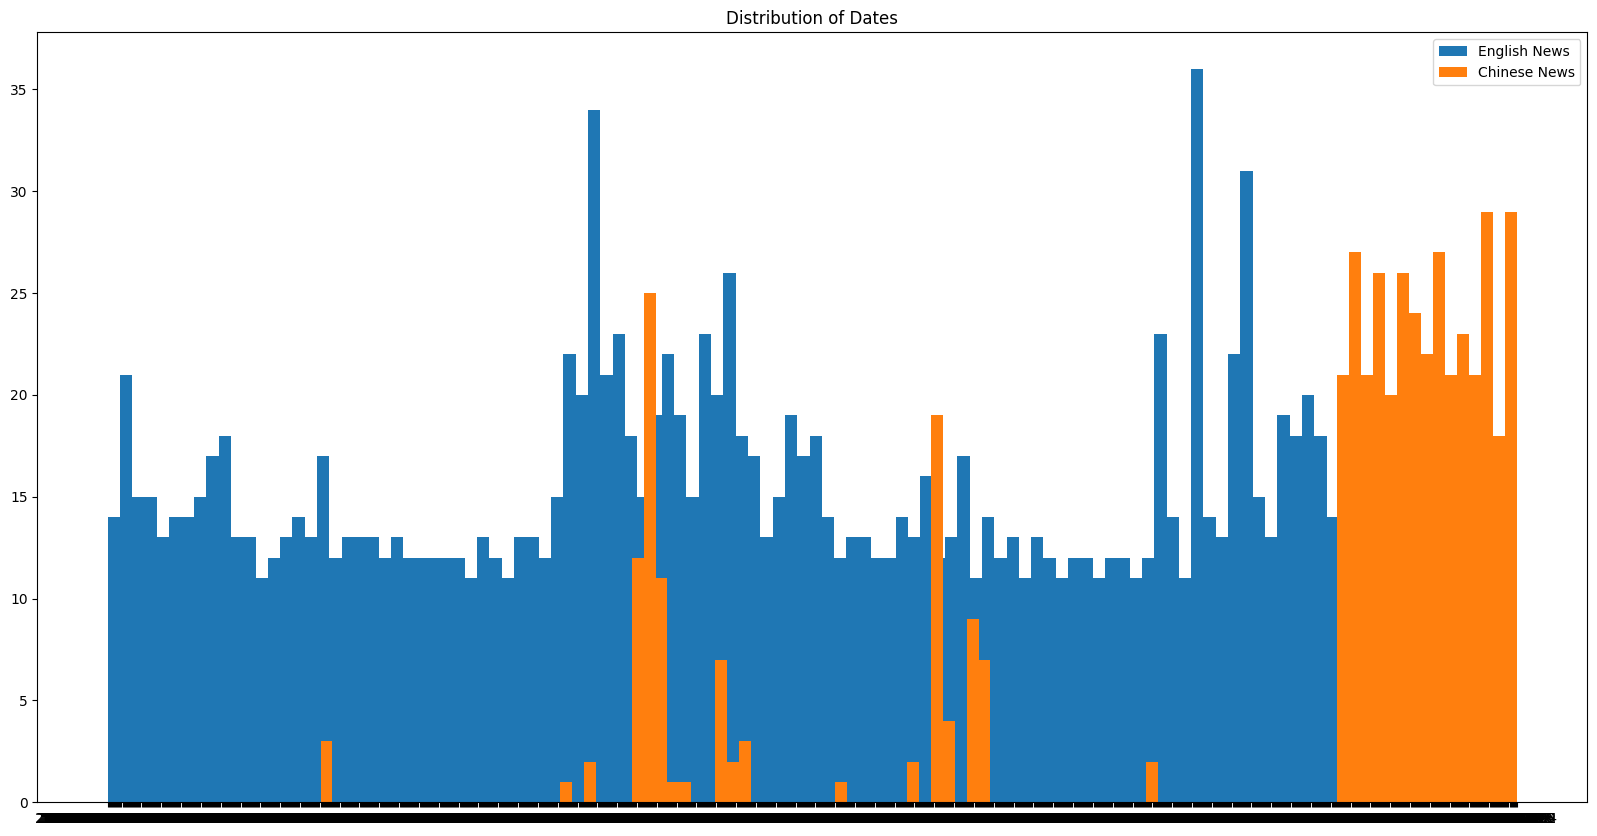

In [42]:
# Distribution of tweets and news articles over time

# Set figure size and title
plt.figure(figsize=(20, 10))
plt.title("Distribution of Dates")

# Create histogram of date column
plt.hist(relevant_en_news["date"], bins=100, label="English News")
plt.hist(relevant_ch_news["date"], bins=100, label="Chinese News")
plt.legend()

# Display the plot
plt.show()